# Part1 数据预处理  
使用数据：Car_details_merged.csv  里面没有used_car.csv的数据 后续加

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 
#导入数据
data = pd.read_csv('../Dataset/Car_details_merged.csv')

In [118]:
data.head(5)

,Brand,Model,Year,Age,Kilometer,Fuel Type,Fuel Type.1,Engine,Max Power,Transmission,Seats,Price
0,Maruti,Swift Dzire VDI,2014,11,145500,Diesel,Diesel,1248 CC,74 bhp,Manual,5.0,450000
1,Skoda,Rapid 1.5 TDI Ambition,2014,11,120000,Diesel,Diesel,1498 CC,103.52 bhp,Manual,5.0,370000
2,Honda,City 2017-2020 EXi,2006,19,140000,Petrol,Petrol,1497 CC,78 bhp,Manual,5.0,158000
3,Hyundai,i20 Sportz Diesel,2010,15,127000,Diesel,Diesel,1396 CC,90 bhp,Manual,5.0,225000
4,Maruti,Swift VXI BSIII,2007,18,120000,Petrol,Petrol,1298 CC,88.2 bhp,Manual,5.0,130000


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9892 entries, 0 to 9891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         9892 non-null   object 
 1   Model         9892 non-null   object 
 2   Year          9892 non-null   int64  
 3   Age           9892 non-null   int64  
 4   Kilometer     9892 non-null   int64  
 5   Fuel Type     9892 non-null   object 
 6   Fuel Type.1   9892 non-null   object 
 7   Engine        9886 non-null   object 
 8   Max Power     9892 non-null   object 
 9   Transmission  9892 non-null   object 
 10  Seats         9886 non-null   float64
 11  Price         9892 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 927.5+ KB


逐个分析，**brand和model先放着（？**  
Fuel Type 和 Fuel Type.1是为了部分车型出现了不同fuel类型而出现的，后续先提取  
Engine和Max Power也可以转换为数值型数据  
Transmission适合encode处理




In [120]:
diff_Type_rows = data[data['Fuel Type'] != data['Fuel Type.1']]

print("Different Fuel Type Row:", len(diff_Type_rows))
print(diff_Type_rows[['Fuel Type', 'Fuel Type.1']])

Different Fuel Type Row: 88
     Fuel Type Fuel Type.1
6          LPG       Other
33         CNG       Other
86         LPG       Other
196        CNG       Other
388        CNG       Other
...        ...         ...
7114       CNG       Other
7339       CNG       Other
7435       LPG       Other
7524       CNG       Other
7702       CNG       Other

[88 rows x 2 columns]


In [121]:
data['Max Power'] = data['Max Power'].replace('', pd.NA)
data.isnull().sum()
# 不难发现有6个异常数据，这里先简单处理！直接删掉那6个 （见图）

Brand           0
Model           0
Year            0
Age             0
Kilometer       0
Fuel Type       0
Fuel Type.1     0
Engine          6
Max Power       0
Transmission    0
Seats           6
Price           0
dtype: int64

**删掉的6个值**
![](../Dataset/missing_value.png)

In [122]:
data = data.dropna(subset=['Engine', 'Seats'])
data.isnull().sum()

Brand           0
Model           0
Year            0
Age             0
Kilometer       0
Fuel Type       0
Fuel Type.1     0
Engine          0
Max Power       0
Transmission    0
Seats           0
Price           0
dtype: int64

In [123]:
#Engine 和 Max Power转化为数值型数据 
#方法参考 ：https://zhuanlan.zhihu.com/p/567458117
data['Engine'] = data['Engine'].astype(str)
data['Engine'] = data['Engine'].str.replace('cc', '',case=False, regex=False)
data['Max Power'] = pd.to_numeric(data['Max Power'], errors='coerce')

data['Max Power'] = data['Max Power'].astype(str)
data['Max Power'] = data['Max Power'].str.replace('bhp', '',case=False, regex=False)
data['Max Power'] = pd.to_numeric(data['Max Power'], errors='coerce')

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9886 entries, 0 to 9891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         9886 non-null   object 
 1   Model         9886 non-null   object 
 2   Year          9886 non-null   int64  
 3   Age           9886 non-null   int64  
 4   Kilometer     9886 non-null   int64  
 5   Fuel Type     9886 non-null   object 
 6   Fuel Type.1   9886 non-null   object 
 7   Engine        9886 non-null   object 
 8   Max Power     0 non-null      float64
 9   Transmission  9886 non-null   object 
 10  Seats         9886 non-null   float64
 11  Price         9886 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1004.0+ KB


**Transmission 编码**  
在最后添加一列transmission_code 后续需要解决数据不均的问题
Manumal的数据量比Automatic多很多（但是没有达到量级差距，还得再进一步讨论）

In [124]:
print(data['Transmission'].unique())
data['Transmission_code'] = data['Transmission'].map({'Manual': 1, 'Automatic': 0})
print(data['Transmission_code'].value_counts())

['Manual' 'Automatic']
Transmission_code
1    7961
0    1925
Name: count, dtype: int64


**Fuel Type编码**  
有一批数据第一列就是Other (那第二列一定也是Other了)  
有一批数据第一列正常，第二列用的Other

思路：   1.先对第一列为Other的进行处理，通过model名rewrite Fuel Type 再把第二列Other覆盖  
        2.

In [125]:
print(data['Fuel Type'].unique())
print("第一列分布：\n", data['Fuel Type'].value_counts())
print()
print(data['Fuel Type.1'].unique())
print("第二列分布：\n", data['Fuel Type.1'].value_counts())


['Diesel' 'Petrol' 'LPG' 'CNG' 'Other']
第一列分布：
 Fuel Type
Diesel    5316
Petrol    4422
Other       60
CNG         53
LPG         35
Name: count, dtype: int64

['Diesel' 'Petrol' 'Other']
第二列分布：
 Fuel Type.1
Diesel    5316
Petrol    4422
Other      148
Name: count, dtype: int64


In [126]:
#从Model名填写Fuel Type第一列为Other的情况。
data['Model'] = data['Model'].astype(str)

data.loc[
    (data['Fuel Type'] == 'Other') & (data['Model'].str.contains('CNG', case=False, na=False)),
    ['Fuel Type', 'Fuel Type.1']
] = 'CNG'
data.loc[
    (data['Fuel Type'] == 'Other') & (data['Model'].str.contains('LPG', case=False, na=False)),
    ['Fuel Type', 'Fuel Type.1']
] = 'LPG'

In [127]:
print("第一列分布：\n", data['Fuel Type'].value_counts())
print()
print("第二列分布：\n", data['Fuel Type.1'].value_counts())

第一列分布：
 Fuel Type
Diesel    5316
Petrol    4422
CNG        104
LPG         40
Other        4
Name: count, dtype: int64

第二列分布：
 Fuel Type.1
Diesel    5316
Petrol    4422
Other       92
CNG         51
LPG          5
Name: count, dtype: int64


**e.g. 针对第一列数据，删除四个other，剩下四种用one-hot编码，后续根据需要进行修改**

In [128]:
data = data[data['Fuel Type'] != 'Other']
fuel_dummies = pd.get_dummies(data['Fuel Type'], prefix='Fuel',dtype = int)
data = pd.concat([data, fuel_dummies], axis=1)

print(data[['Fuel Type'] + list(fuel_dummies.columns)].head())

  Fuel Type  Fuel_CNG  Fuel_Diesel  Fuel_LPG  Fuel_Petrol
0    Diesel         0            1         0            0
1    Diesel         0            1         0            0
2    Petrol         0            0         0            1
3    Diesel         0            1         0            0
4    Petrol         0            0         0            1


# Part2 可视化

In [129]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

<Axes: ylabel='Count'>

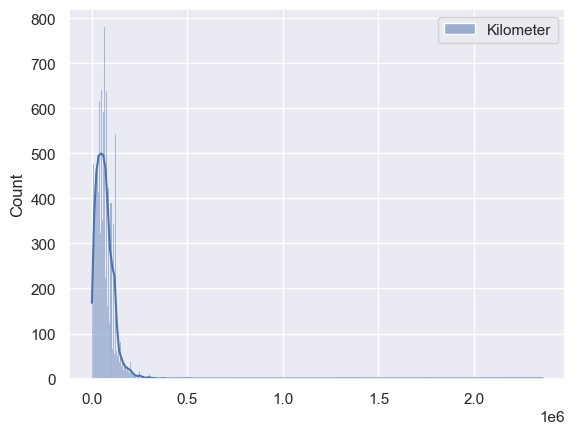

In [130]:
km = pd.DataFrame(data['Kilometer'])
sb.histplot(km, kde=True)

<Axes: >

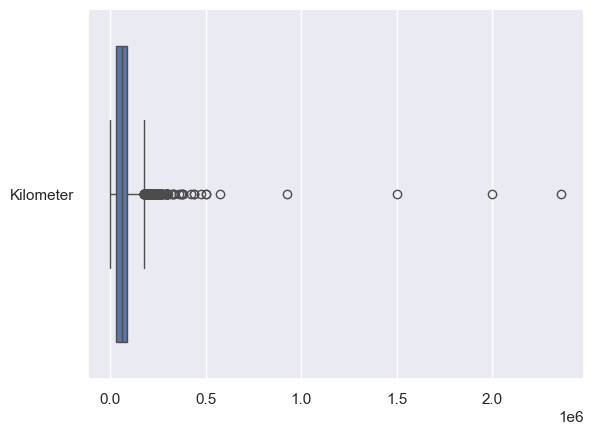

In [131]:
sb.boxplot(data = km, orient = "h")

<Axes: >

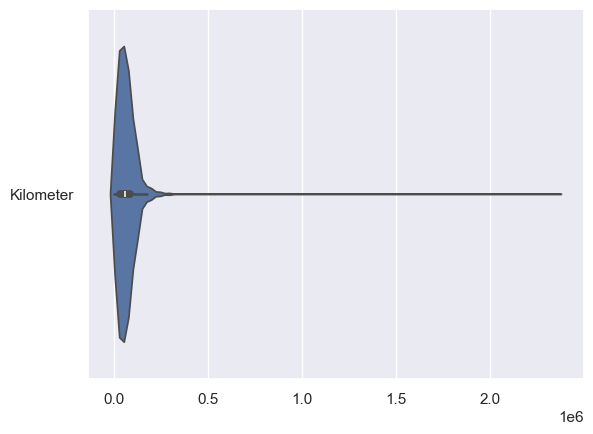

In [132]:
sb.violinplot(data=km,orient = "h")